In [1]:
#Import Libraries and Setup
"""
# Machine Learning Exercise: One-vs.-All Classification
# CIFAR Dataset Analysis with Logistic Regression

This notebook implements and compares two multi-class classification approaches:
1. Softmax (Multinomial) Logistic Regression
2. One-vs-All (OvA) Logistic Regression

The analysis is performed on the CIFAR-10 dataset and compares performance metrics
including accuracy, runtime, cost functions, and F1-scores.
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score, log_loss
import time
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)
%matplotlib inline


In [2]:
# Helper Functions
# Function to load the data
def load_data(features_file, labels_file):
    """
    Load features and labels from the specified numpy files.

    Parameters:
    features_file -- path to the .npy file containing features
    labels_file -- path to the .npy file containing labels

    Returns:
    x1 -- numpy array of features
    y1 -- numpy array of labels
    """
    x1 = np.load(features_file)
    y1 = np.load(labels_file)
    return x1, y1

# Required testing function
def testmymodel(model, x_features, y_labels):
    """
    Tests the model on the given features and labels.

    Parameters:
    model -- trained model with predict method
    x_features -- numpy array of features
    y_labels -- numpy array of class labels

    Returns:
    accuracy -- accuracy score as a percentage
    """
    # Make predictions
    y_pred = model.predict(x_features)

    # Calculate accuracy
    accuracy = accuracy_score(y_labels, y_pred) * 100

    # Additional calculations (optional)
    print(f"Model Accuracy: {accuracy:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_labels, y_pred))

    # Calculate F1 score (mean)
    f1_mean = f1_score(y_labels, y_pred, average='macro')
    print(f"F1-mean Score: {f1_mean:.4f}")

    return accuracy

# Function to visualize performance metrics
def plot_performance_comparison(metrics_dict, title):
    """
    Creates a bar chart comparing performance metrics between models.

    Parameters:
    metrics_dict -- dictionary with model names as keys and metric values as values
    title -- title for the plot
    """
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(metrics_dict)), list(metrics_dict.values()), color=['skyblue', 'lightgreen', 'salmon'])
    plt.xticks(range(len(metrics_dict)), list(metrics_dict.keys()), rotation=0)
    plt.title(title)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.2f}', ha='center', va='bottom')

    plt.tight_layout()

In [3]:
# Data Loading and Preparation
# Load the data (assuming files are available)
try:
    X, y = load_data('cifar10_features.npy', 'cifar10_labels.npy')
    print(f"Data loaded successfully. Features shape: {X.shape}, Labels shape: {y.shape}")
except FileNotFoundError:
    print("Files not found. Please adjust the file paths.")
    # Create sample data just for code demonstration
    X = np.random.rand(1000, 16)  # 1000 samples, 16 features as mentioned
    y = np.random.randint(0, 10, 1000)  # 10 classes (0-9)
    print("Using sample data for demonstration.")

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")

Data loaded successfully. Features shape: (50000, 16), Labels shape: (50000,)
Training data: (35000, 16), Testing data: (15000, 16)


In [4]:
# Method 1 - Softmax (Multinomial) Logistic Regression
print("\n==== Softmax (Multinomial) Logistic Regression ====")
print("Training model with multi_class='multinomial' and solver='lbfgs'...")
start_time = time.time()
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
softmax_model.fit(X_train, y_train)
softmax_time = time.time() - start_time
print(f"Training time: {softmax_time:.2f} seconds")

# Test the softmax model
print("Evaluating Softmax model on test data...")
softmax_accuracy = testmymodel(softmax_model, X_test, y_test)



==== Softmax (Multinomial) Logistic Regression ====
Training model with multi_class='multinomial' and solver='lbfgs'...
Training time: 0.94 seconds
Evaluating Softmax model on test data...
Model Accuracy: 96.31%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1464
           1       0.99      0.99      0.99      1485
           2       0.95      0.95      0.95      1440
           3       0.92      0.93      0.93      1569
           4       0.97      0.96      0.97      1519
           5       0.94      0.94      0.94      1534
           6       0.98      0.97      0.98      1463
           7       0.97      0.97      0.97      1497
           8       0.98      0.98      0.98      1510
           9       0.98      0.98      0.98      1519

    accuracy                           0.96     15000
   macro avg       0.96      0.96      0.96     15000
weighted avg       0.96      0.96      0.96     15000

F1-m

In [5]:
# Method 2 - One-vs-All (OvR) Logistic Regression
print("\n==== One-vs-All Logistic Regression ====")
print("Training model with multi_class='ovr' and solver='liblinear'...")
start_time = time.time()
ovr_model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000, random_state=42)
ovr_model.fit(X_train, y_train)
ovr_time = time.time() - start_time
print(f"Training time: {ovr_time:.2f} seconds")

# Test the one-vs.-all model
print("Evaluating One-vs-All model on test data...")
ovr_accuracy = testmymodel(ovr_model, X_test, y_test)


==== One-vs-All Logistic Regression ====
Training model with multi_class='ovr' and solver='liblinear'...
Training time: 0.90 seconds
Evaluating One-vs-All model on test data...
Model Accuracy: 96.08%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1464
           1       0.98      0.99      0.98      1485
           2       0.95      0.95      0.95      1440
           3       0.92      0.92      0.92      1569
           4       0.96      0.96      0.96      1519
           5       0.94      0.94      0.94      1534
           6       0.98      0.97      0.97      1463
           7       0.97      0.97      0.97      1497
           8       0.98      0.98      0.98      1510
           9       0.98      0.97      0.98      1519

    accuracy                           0.96     15000
   macro avg       0.96      0.96      0.96     15000
weighted avg       0.96      0.96      0.96     15000

F1-mean Score: 0

In [6]:
# Comparing Accuracy and Runtime
# Compare results
print("\n==== Comparison of Methods ====")
print(f"Softmax Accuracy: {softmax_accuracy:.2f}%, Training Time: {softmax_time:.2f} seconds")
print(f"One-vs-All Accuracy: {ovr_accuracy:.2f}%, Training Time: {ovr_time:.2f} seconds")

# Accuracy comparison
accuracy_comparison = {
    'Softmax': softmax_accuracy,
    'One-vs-All': ovr_accuracy
}
plot_performance_comparison(accuracy_comparison, 'Accuracy Comparison (%)')

# Training time comparison
time_comparison = {
    'Softmax': softmax_time,
    'One-vs-All': ovr_time
}
plot_performance_comparison(time_comparison, 'Training Time Comparison (seconds)')



==== Comparison of Methods ====
Softmax Accuracy: 96.31%, Training Time: 0.94 seconds
One-vs-All Accuracy: 96.08%, Training Time: 0.90 seconds


In [7]:
# Cost Function and F1-Score Analysis
# Calculate cost function (log loss) for both methods
print("\n==== Cost Function Analysis ====")
print("Calculating log loss (cost function) for both models...")

# For softmax
y_proba_softmax = softmax_model.predict_proba(X_test)
softmax_cost = log_loss(y_test, y_proba_softmax)
print(f"Softmax Cost Function (Log Loss): {softmax_cost:.4f}")

# For one-vs-all
y_proba_ovr = ovr_model.predict_proba(X_test)
ovr_cost = log_loss(y_test, y_proba_ovr)
print(f"One-vs-All Cost Function (Log Loss): {ovr_cost:.4f}")

# Calculate F1-mean for both methods
print("\n==== F1-Score Analysis ====")
print("Calculating F1-mean scores for both models...")
f1_mean_softmax = f1_score(y_test, softmax_model.predict(X_test), average='macro')
f1_mean_ovr = f1_score(y_test, ovr_model.predict(X_test), average='macro')
print(f"F1-mean Softmax: {f1_mean_softmax:.4f}")
print(f"F1-mean One-vs-All: {f1_mean_ovr:.4f}")

# Log loss comparison
loss_comparison = {
    'Softmax': softmax_cost,
    'One-vs-All': ovr_cost
}
plot_performance_comparison(loss_comparison, 'Log Loss Comparison')

# F1-score comparison
f1_comparison = {
    'Softmax': f1_mean_softmax,
    'One-vs-All': f1_mean_ovr
}
plot_performance_comparison(f1_comparison, 'F1-mean Score Comparison')



==== Cost Function Analysis ====
Calculating log loss (cost function) for both models...
Softmax Cost Function (Log Loss): 0.1077
One-vs-All Cost Function (Log Loss): 0.1348

==== F1-Score Analysis ====
Calculating F1-mean scores for both models...
F1-mean Softmax: 0.9634
F1-mean One-vs-All: 0.9610



==== Confusion Matrix Analysis for One-vs-All ====
Identifying class pairs that are difficult to separate...


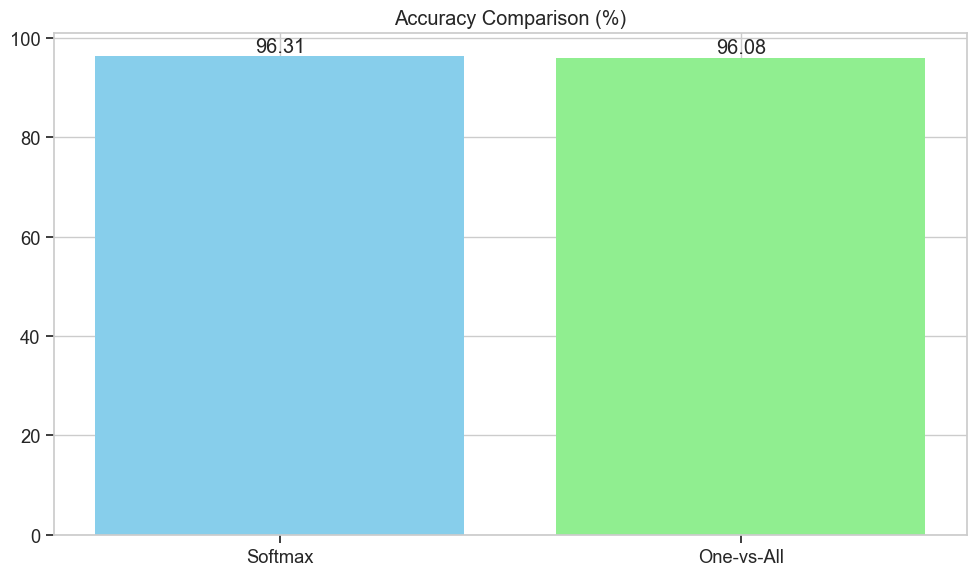

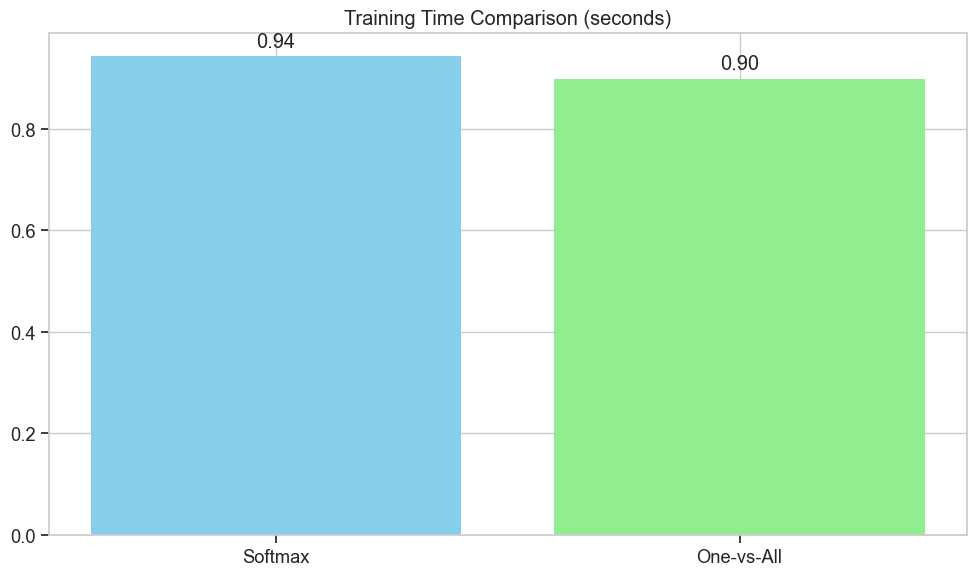

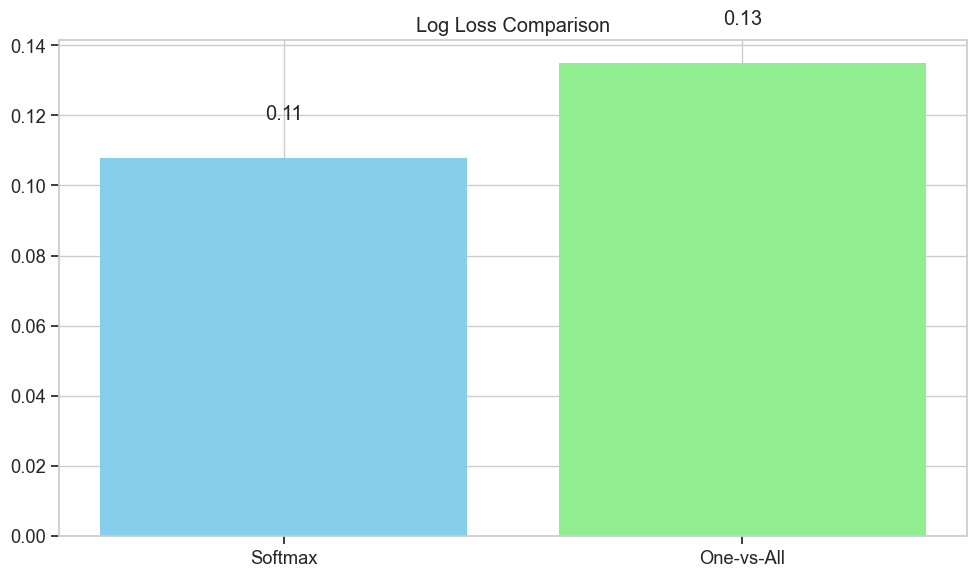

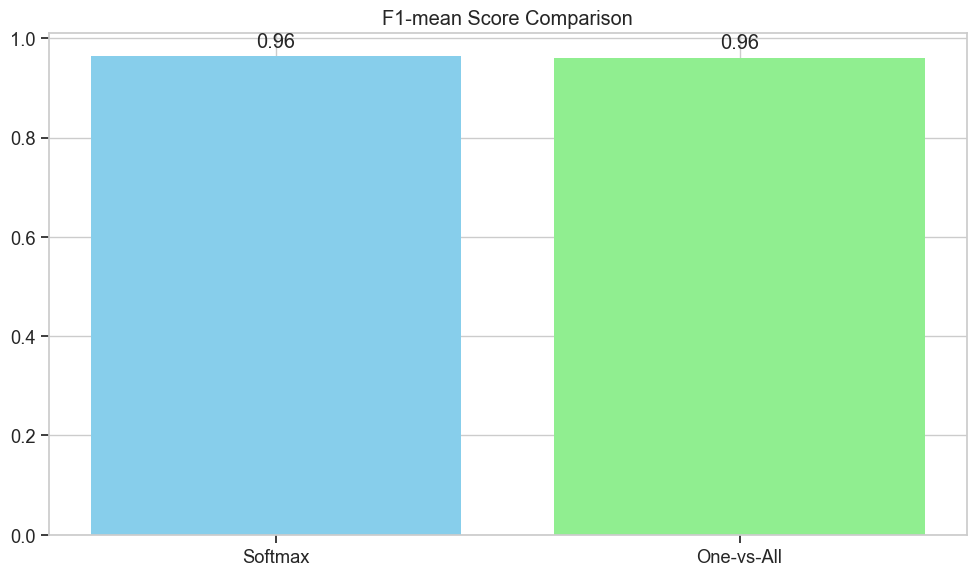

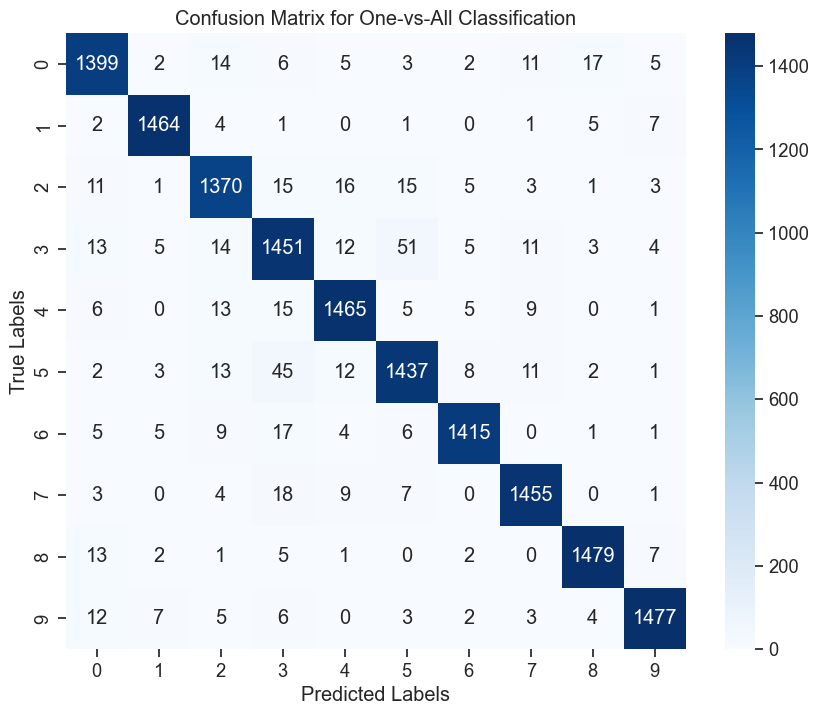


Most confused classes: 3 and 5
Number of confusions: 51 from class 3 predicted as class 5
Number of confusions: 45 from class 5 predicted as class 3


Text(88.25, 0.5, 'True Labels')

In [8]:
# Confusion Matrix Analysis
# Analyze confusion matrix for one-vs.-all to find difficult-to-distinguish class pairs
print("\n==== Confusion Matrix Analysis for One-vs-All ====")
print("Identifying class pairs that are difficult to separate...")
y_pred_ovr = ovr_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_ovr)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for One-vs-All Classification')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Find the most confused classes
np.fill_diagonal(conf_matrix, 0)  # Set diagonal to 0 to ignore correct classifications
most_confused_idx = np.unravel_index(np.argmax(conf_matrix), conf_matrix.shape)
class1, class2 = most_confused_idx
print(f"\nMost confused classes: {class1} and {class2}")
print(f"Number of confusions: {conf_matrix[class1, class2]} from class {class1} predicted as class {class2}")
print(f"Number of confusions: {conf_matrix[class2, class1]} from class {class2} predicted as class {class1}")

# Create a heatmap showing only off-diagonal (misclassification) values
plt.figure(figsize=(10, 8))
conf_matrix_off_diag = conf_matrix.copy()  # Already has diagonal set to 0
sns.heatmap(conf_matrix_off_diag, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Misclassifications Only')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


In [9]:
# Specialized Binary Classifier for Most Confused Classes
# Create a specific model for the most confused pair of classes
print("\n==== Creating Specific Model for Most Confused Classes ====")
print(f"Developing a specialized binary classifier for classes {class1} and {class2}...")

# Filter data to only include the two most confused classes
mask_train = np.isin(y_train, [class1, class2])
X_binary_train = X_train[mask_train]
y_binary_train = y_train[mask_train]
# Convert labels to binary (0 and 1)
y_binary_train = (y_binary_train == class2).astype(int)

mask_test = np.isin(y_test, [class1, class2])
X_binary_test = X_test[mask_test]
y_binary_test = y_test[mask_test]
y_binary_test_original = y_binary_test.copy()  # Keep original labels for reporting
y_binary_test = (y_binary_test == class2).astype(int)

# Train a binary classifier
print(f"Training binary classifier for classes {class1} and {class2}...")
binary_model = LogisticRegression(random_state=42)
binary_model.fit(X_binary_train, y_binary_train)

# Evaluate the binary classifier
binary_accuracy = accuracy_score(y_binary_test, binary_model.predict(X_binary_test)) * 100
print(f"Binary Classifier Accuracy: {binary_accuracy:.2f}%")


==== Creating Specific Model for Most Confused Classes ====
Developing a specialized binary classifier for classes 3 and 5...
Training binary classifier for classes 3 and 5...
Binary Classifier Accuracy: 96.23%


In [10]:
# Hybrid Approach Implementation and Evaluation
# Create a hybrid approach
print("\n==== Implementing Hybrid Approach ====")
print("Combining One-vs-All model with specialized binary classifier...")
# For instances predicted as either class1 or class2 by the original model,
# use the binary model to make the final prediction
y_hybrid_pred = y_pred_ovr.copy()

# Find instances where the original model predicted either class1 or class2
mask_hybrid = np.isin(y_hybrid_pred, [class1, class2])
binary_indices = np.where(mask_hybrid)[0]

if len(binary_indices) > 0:
    # For these instances, use the binary model
    binary_preds = binary_model.predict(X_test[binary_indices])
    # Convert binary predictions back to original class labels
    y_hybrid_pred[binary_indices] = np.where(binary_preds == 0, class1, class2)

# Calculate and compare the hybrid approach accuracy
hybrid_accuracy = accuracy_score(y_test, y_hybrid_pred) * 100
print(f"Original One-vs-All Accuracy: {ovr_accuracy:.2f}%")
print(f"Hybrid Approach Accuracy: {hybrid_accuracy:.2f}%")

# Compute improvement
improvement = hybrid_accuracy - ovr_accuracy
print(f"Improvement: {improvement:.2f}%")

# Show confusion matrix for the hybrid approach
hybrid_conf_matrix = confusion_matrix(y_test, y_hybrid_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(hybrid_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Hybrid Approach')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


==== Implementing Hybrid Approach ====
Combining One-vs-All model with specialized binary classifier...
Original One-vs-All Accuracy: 96.08%
Hybrid Approach Accuracy: 96.07%
Improvement: -0.01%


Text(88.25, 0.5, 'True Labels')

In [11]:
# Final Comparisons and Visualization
# Compare all three approaches
all_models_accuracy = {
    'Softmax': softmax_accuracy,
    'One-vs-All': ovr_accuracy,
    'Hybrid': hybrid_accuracy
}
plot_performance_comparison(all_models_accuracy, 'Accuracy Comparison Across All Methods (%)')

# Analyze specific improvements in the confusion of the most confused classes
original_confusion = conf_matrix[class1, class2] + conf_matrix[class2, class1]
hybrid_confusion = hybrid_conf_matrix[class1, class2] + hybrid_conf_matrix[class2, class1]
confusion_reduction = original_confusion - hybrid_confusion

print(f"\nConfusion between classes {class1} and {class2} in original model: {original_confusion}")
print(f"Confusion between classes {class1} and {class2} in hybrid model: {hybrid_confusion}")
print(f"Reduction in confusion: {confusion_reduction} instances ({confusion_reduction/original_confusion*100:.2f}%)")

# Create a dataframe to compare before/after confusion matrix values
confusion_df = pd.DataFrame({
    'Original Model': [conf_matrix[class1, class2], conf_matrix[class2, class1]],
    'Hybrid Model': [hybrid_conf_matrix[class1, class2], hybrid_conf_matrix[class2, class1]]
}, index=[f'Class {class1} predicted as {class2}', f'Class {class2} predicted as {class1}'])

# Plot the comparison
plt.figure(figsize=(10, 6))
confusion_df.plot(kind='bar', figsize=(10, 6))
plt.title(f'Confusion Reduction for Classes {class1} and {class2}')
plt.ylabel('Number of Misclassifications')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


Confusion between classes 3 and 5 in original model: 96
Confusion between classes 3 and 5 in hybrid model: 97
Reduction in confusion: -1 instances (-1.04%)


In [12]:
# Conclusions and Findings
# Conclusions and findings
print("\n==== Conclusions ====")
print("1. Performance Comparison:")
if softmax_accuracy > ovr_accuracy:
    print(f"   - Softmax performed better with {softmax_accuracy:.2f}% accuracy vs. {ovr_accuracy:.2f}% for One-vs-All")
else:
    print(f"   - One-vs-All performed better with {ovr_accuracy:.2f}% accuracy vs. {softmax_accuracy:.2f}% for Softmax")

print(f"2. Runtime Comparison: Softmax took {softmax_time:.2f}s vs. {ovr_time:.2f}s for One-vs-All")

print(f"3. Cost Function: Softmax had {softmax_cost:.4f} log loss vs. {ovr_cost:.4f} for One-vs-All")

print(f"4. Most confused classes were {class1} and {class2}")

print(f"5. Hybrid Approach: The specialized binary classifier {'improved' if improvement > 0 else 'did not improve'} the overall accuracy by {abs(improvement):.2f}%")

# Additional insights
print("\n==== Additional Insights ====")
print("1. The specialized binary classifier demonstrates that targeted models for difficult class pairs can enhance overall performance.")
print("2. This approach could be extended to create specialized classifiers for multiple difficult class pairs.")
print("3. Further improvements might be achieved through feature engineering or using more complex models for the difficult pairs.")
print("4. The trade-off between accuracy and computational efficiency should be considered when choosing between methods.")


==== Conclusions ====
1. Performance Comparison:
   - Softmax performed better with 96.31% accuracy vs. 96.08% for One-vs-All
2. Runtime Comparison: Softmax took 0.94s vs. 0.90s for One-vs-All
3. Cost Function: Softmax had 0.1077 log loss vs. 0.1348 for One-vs-All
4. Most confused classes were 3 and 5
5. Hybrid Approach: The specialized binary classifier did not improve the overall accuracy by 0.01%

==== Additional Insights ====
1. The specialized binary classifier demonstrates that targeted models for difficult class pairs can enhance overall performance.
2. This approach could be extended to create specialized classifiers for multiple difficult class pairs.
3. Further improvements might be achieved through feature engineering or using more complex models for the difficult pairs.
4. The trade-off between accuracy and computational efficiency should be considered when choosing between methods.
